Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

* Выборка , X_n ~ N(9.57, 0.4), X_0 ~ N(9.5, 0.4)
* H0: средний уровень кальция популяции не отличается от среднего mu = mu0
* H1: mu != mu0

Пример решения из лекции

* Средний вес детей при рождении составляет 3300 г.
В то же время, если мать ребёнка живёт за чертой бедности, то средний вес таких детей — 2800 г. Вес при
рождении — это очень важный показатель здоровья ребенка. Так, только 7% детей рождаются с весом меньше
2.5 кг, однако на них приходится 70% детских смертей.
С целью увеличить вес тех детей, чьи матери живут за чертой бедности, разработана эксперименталь-
ная программа ведения беременности. Чтобы проверить ее эффективность, проводится эксперимент. В нем
принимают участие 25 женщин, живущих за чертой бедности. У всех них рождаются дети, и их средний вес
составляет 3075 г.

T=(3075-2800)/((3300-2800)/sqrt(25))=2.75,

p=2(1-St(24 ст.св,2.75))=2(1-0.994426085089858)=0.01114782982028410

* Считаешь z по формуле из лекций, потом получаешь плотность через stat..norm.cdf, далее выбираешь альтернативу и считаешь для нее p

Добрый день! При проверке 4-го задания грейдер пишет "Кажется, вы использовали t-критерий; но 0.4 — это не выборочное стандартное отклонение, а предполагаемое стандартное отклонение во всей популяции, так что правильнее взять z-критерий."

Проблема в том, что при тогда ответ у меня получается 2.0

Я использовала функцию scipy.stats.t.cdf для двусторонней альтернативы, а нужно, я так поняла - scipy.stats.norm.cdf. Укажите пожалуйста на мою ошибку

Если кому будет полезно - нужно использовать просто stats.norm.cdf(z).

import math
def z_stat(x_1, x_2, sigma_1, sigma_2, n_1, n_2):
    return (x_1 - x_2)/math.sqrt(((sigma_1**2)/n_1)+((sigma_2**2)/n_2))

z = z_stat(9.57, 9.5, 0.4, 0.4, 160, 160)
z

In [122]:
z = (9.57 - 9.5)/(0.4/math.sqrt(160))
z

2.213594362117875

In [123]:
from scipy.stats import norm
#f_n = norm.cdf(abs(z))
f_n = norm.cdf(z)
f_n


0.98657165224623811

In [124]:
p = 2*(1 - f_n)
p

0.026856695507523787

Имеются данные о стоимости и размерах 53940 бриллиантов:
diamonds.txt

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

    * линейную регрессию с помощью LinearRegression без параметров
    * случайный лес с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

* Отвергается, p<α

* Не отвергается, p>α

In [6]:
import pandas as pd
dm = pd.read_csv("diamonds.txt", sep='\t')
dm.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [7]:
from sklearn.cross_validation import train_test_split
dm_train, dm_test = train_test_split(dm, test_size=.25, random_state=1)
print type(dm_train), type(dm_test)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


/home/sigor/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
x_train = dm_train.drop(['price'], axis=1)
y_train = dm_train['price']
                       

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
tree = RandomForestRegressor(random_state=1)

In [38]:
tree.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [39]:
x_test = dm_test.drop(['price'], axis=1)
y_test = dm_test['price']
tree_pred = tree.predict(x_test)

In [40]:
tree_pred

array([  858.55,  7205.6 ,  2060.  , ...,  4711.  ,  3435.3 ,  1081.9 ])

In [41]:
tree_sub = abs(y_test - tree_pred)
tree_sub.head()

2714      294.55
14653    1291.60
52760     502.00
48658      42.00
14812    2375.50
Name: price, dtype: float64

In [35]:
from sklearn.linear_model import LinearRegression

In [42]:
linear = LinearRegression()


In [43]:
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
linear_pred = linear.predict(x_test)

In [49]:
linear_sub = abs(y_test - linear_pred)
linear_sub.head()

2714      214.422356
14653    1016.460537
52760      41.878717
48658       7.165645
14812    1113.152701
Name: price, dtype: float64

In [50]:
def mserror(y, y_pred):
    return (sum((y - y_pred)**2)) / y.shape[0]


In [51]:
mserror(y_test, linear_pred)

2140750.137628505

In [52]:
mserror(y_test, tree_pred)

1978751.272738431

In [57]:
tree_quality = tree.score(x_test, y_test)
tree_quality

0.87202837881178941

In [58]:
linear_quality = linear.score(x_test, y_test)
linear_quality

0.86155143931148481

Какая из моделей лучше предсказывает цену бриллиантов? Tree

Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости.

**H_0:** среднее качество linear равно среднему качеству tree, linear_quality == tree_quality

**H_1:** linear_quality != tree_quality

In [129]:
stats.ttest_rel(abs(y_test - linear.predict(x_test)), 
                abs(y_test - tree.predict(x_test)))

Ttest_relResult(statistic=12.93081761494892, pvalue=5.0741755756509474e-38)

In [59]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [64]:
max(y_test)

18804

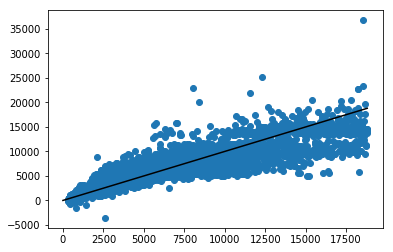

In [66]:
pylab.scatter(y_test, linear_pred)
pylab.plot(range(max(y_test)), c='black')

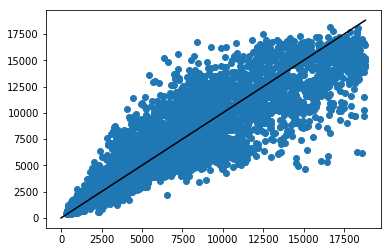

In [67]:
pylab.scatter(y_test, tree_pred)
pylab.plot(range(max(y_test)), c='black')

(array([ 319.,  317.,  283.,  325.,  307.,  302.,  336.,  279.,  269.,
         254.,  276.,  257.,  272.,  264.,  246.,  239.,  263.,  234.,
         257.,  228.,  191.,  193.,  195.,  190.,  171.,  173.,  168.,
         173.,  139.,  138.,  170.,  158.,  133.,  123.,  124.,  113.,
         120.,   91.,  114.,  111.,  115.,  109.,   79.,   92.,   87.,
          83.,   83.,   94.,   90.,   71.,   84.,   80.,   71.,   63.,
          72.,   71.,   70.,   56.,   67.,   47.,   59.,   59.,   43.,
          47.,   51.,   58.,   64.,   51.,   48.,   39.,   40.,   47.,
          63.,   45.,   44.,   34.,   49.,   33.,   40.,   48.,   32.,
          38.,   33.,   29.,   39.,   32.,   43.,   24.,   37.,   34.,
          39.,   29.,   35.,   27.,   25.,   35.,   32.,   23.,   29.,
          24.,   35.,   32.,   21.,   20.,   17.,   32.,   24.,   26.,
          31.,   25.,   18.,   19.,   28.,   26.,   14.,   25.,   13.,
          15.,   17.,   24.,   16.,   22.,   23.,   28.,   13.,   19.,
      

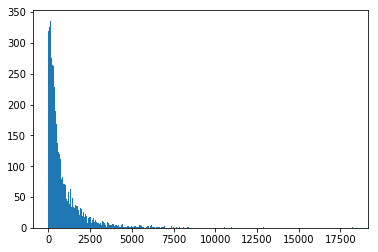

In [73]:
pylab.hist(linear_sub, bins=1000)

(array([ 384.,  377.,  401.,  382.,  327.,  328.,  317.,  324.,  337.,
         302.,  273.,  272.,  282.,  269.,  225.,  232.,  223.,  206.,
         185.,  176.,  205.,  165.,  139.,  157.,  136.,  147.,  140.,
         123.,  111.,   98.,  114.,  105.,   86.,   81.,   97.,   70.,
          99.,   67.,  104.,   87.,   68.,   70.,   65.,   65.,   72.,
          70.,   64.,   61.,   55.,   59.,   70.,   61.,   51.,   51.,
          60.,   42.,   63.,   42.,   46.,   46.,   52.,   49.,   51.,
          45.,   46.,   52.,   45.,   36.,   43.,   37.,   33.,   48.,
          40.,   39.,   42.,   45.,   30.,   30.,   34.,   36.,   26.,
          35.,   30.,   36.,   32.,   23.,   31.,   30.,   26.,   26.,
          25.,   30.,   28.,   18.,   32.,   26.,   34.,   24.,   23.,
          27.,   27.,   15.,   29.,   26.,   30.,   20.,   25.,   24.,
          25.,   22.,   27.,   13.,   18.,   12.,   18.,   21.,   24.,
          21.,   18.,   21.,   17.,   17.,   20.,   17.,   27.,   10.,
      

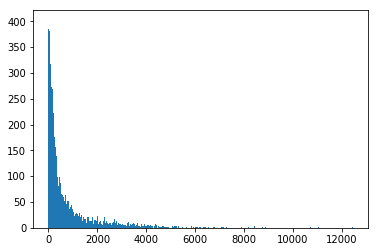

In [74]:
pylab.hist(tree_sub, bins=1000)

In [79]:
linear_quality_2 = sum(linear_sub)/len(linear_sub)
linear_quality_2

890.37640042856117

In [81]:
tree_quality_2 = sum(tree_sub)/len(tree_sub)
tree_quality_2

803.61433830813019

In [82]:
import scipy

/home/sigor/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.6747618913650513, 0.0)

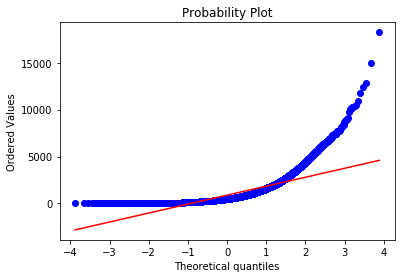

In [87]:
scipy.stats.probplot(linear_sub, dist="norm", plot=pylab)
scipy.stats.shapiro(linear_sub)

(0.6735021471977234, 0.0)

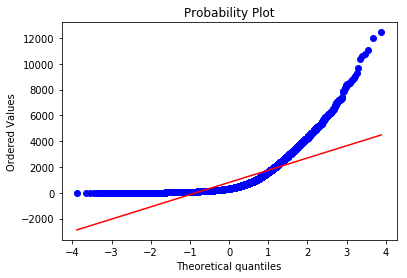

In [94]:
scipy.stats.probplot(tree_sub, dist="norm", plot=pylab)
scipy.stats.shapiro(tree_sub)

In [90]:
from statsmodels.stats.weightstats import *

In [126]:
 DescrStatsW(tree_sub).mean

803.61433830813019

In [93]:
cm = CompareMeans(DescrStatsW(linear_sub), DescrStatsW(tree_sub))

In [128]:
cm.tconfint_diff(usevar="unequal")

(59.124395353208293, 114.39972888765413)

In [99]:
scipy.stats.ttest_ind(linear_sub, tree_sub, equal_var=False)

Ttest_indResult(statistic=6.1531297527437037, pvalue=7.7037355997308151e-10)

In [100]:
scipy.stats.ttest_ind(linear_sub, tree_sub)

Ttest_indResult(statistic=6.1531297527437037, pvalue=7.7037322227084071e-10)

 Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?



   Отвергается, p<α, pvalue=7.7037322227084071e-10 α=0.05

   Не отвергается, p>α


In [105]:
stats.ttest_rel(abs(y_test - linear.predict(x_test)), 
                abs(y_test - tree.predict(x_test)))

Ttest_relResult(statistic=12.93081761494892, pvalue=5.0741755756509474e-38)

In [103]:
stats.ttest_rel(abs(y_test - linear.predict(x_test)), 
                abs(y_test - tree.predict(x_test)))

Ttest_relResult(statistic=12.93081761494892, pvalue=5.0741755756509474e-38)

В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [130]:
zconfint(abs(y_test - linear.predict(x_test)), 
                abs(y_test - tree.predict(x_test)))

(59.125635811584587, 114.39848842927738)

In [134]:
DescrStatsW(linear_sub).mean - DescrStatsW(tree_sub).mean

86.76206212043121